In [1]:
from basic_data_reshape import *
from dpca_calculation import dpca_fit
import pickle
import plots
import importlib
import state_space
importlib.reload(state_space)
from state_space import loo_transform, classify_trials
import numpy as np
import matplotlib.pyplot as plt


/Users/xiangxingyu/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
host = 'china' #'aarhus'

if host == 'aarhus':
    wdir = '/projects/MINDLAB2020_MEG-AuditoryPatternRecognition/'
    mf_dir = wdir + 'scratch/maxfiltered_data/tsss_st16_corr96/'
    ica_dir = wdir + 'scratch/working_memory/ICA/'
    log_dir = wdir + 'misc/working_memory_logs/'
    fig_dir = wdir + 'scratch/working_memory/dPCA/figures/'
    
elif host == 'china':
    wdir = '/Users/xiangxingyu/Downloads/毕业设计/UCB线上科研/data/'
    mf_dir = wdir + '01_raw_maxfiltered/'
    ica_dir = wdir + '02_ica_solution/'
    log_dir = wdir + 'working_memory_logs/'
    fig_dir = './'

In [3]:
ls = ['0011_U7X', '0012_VK2', '0013_NHJ', '0014_BKO', '0016_HJF', '0017_G8O']
ls = ['0011_U7X']
array_ls = []
for i in ls:
    recall_epochs, man_epochs = reshape_to_epochs(-1, 4, _id_ = i, 
                                                  mf_dir=mf_dir,
                                                  ica_dir=ica_dir,
                                                  log_dir=log_dir,
                                                  baseline=(-1, 0),
                                                  notch_filter=50,
                                                  h_freq=20,
                                                  l_freq=0.1,
                                                  events_fun = main_task_decoding_events_fun,
                                                  resample=100)
    array1 = reshape_epoch_to_array(recall_epochs)
    array2 = reshape_epoch_to_array(man_epochs)
    tmp_array = concat_different_array(array1, array2)
    array_ls.append(tmp_array)

final_array_for_dpca, original_indices = stack_different_subject_arrays(array_ls)

print(final_array_for_dpca.shape) #(60, 306, 2, 2, 501)

rejecting incorrect trials
rejecting incorrect trials
(29, 306, 2, 2, 501)


In [4]:
cvz, mz = loo_transform(final_array_for_dpca,'bst',n_components=3)
print(cvz['b'].shape) #(29, 3, 2, 2, 501)
print(mz['b'].shape) #(29, 3, 2, 2, 501)



leave one out transformation

trial  1
trial  2
trial  3
trial  4
trial  5
trial  6
trial  7
trial  8
trial  9
trial  10
trial  11
trial  12
trial  13
trial  14
trial  15
trial  16
trial  17
trial  18
trial  19
trial  20
trial  21
trial  22
trial  23
trial  24
trial  25
trial  26
trial  27
trial  28
trial  29
(29, 3, 2, 2, 501)
(29, 3, 2, 2, 501)


In [5]:
stat_comps_dic = {
    'b':[0],
    's':[1],
    't':[2],
    'bs':[0,1],
    'bt': [0,2],
    'st':[1,2],
    'bst':[0,1,2]
}

def filter_dict(keys_list, input_dict, include_keys=True):
    if include_keys:
        return {key: input_dict[key] for key in keys_list if key in input_dict}
    else:
        return {key: value for key, value in input_dict.items() if key not in keys_list}

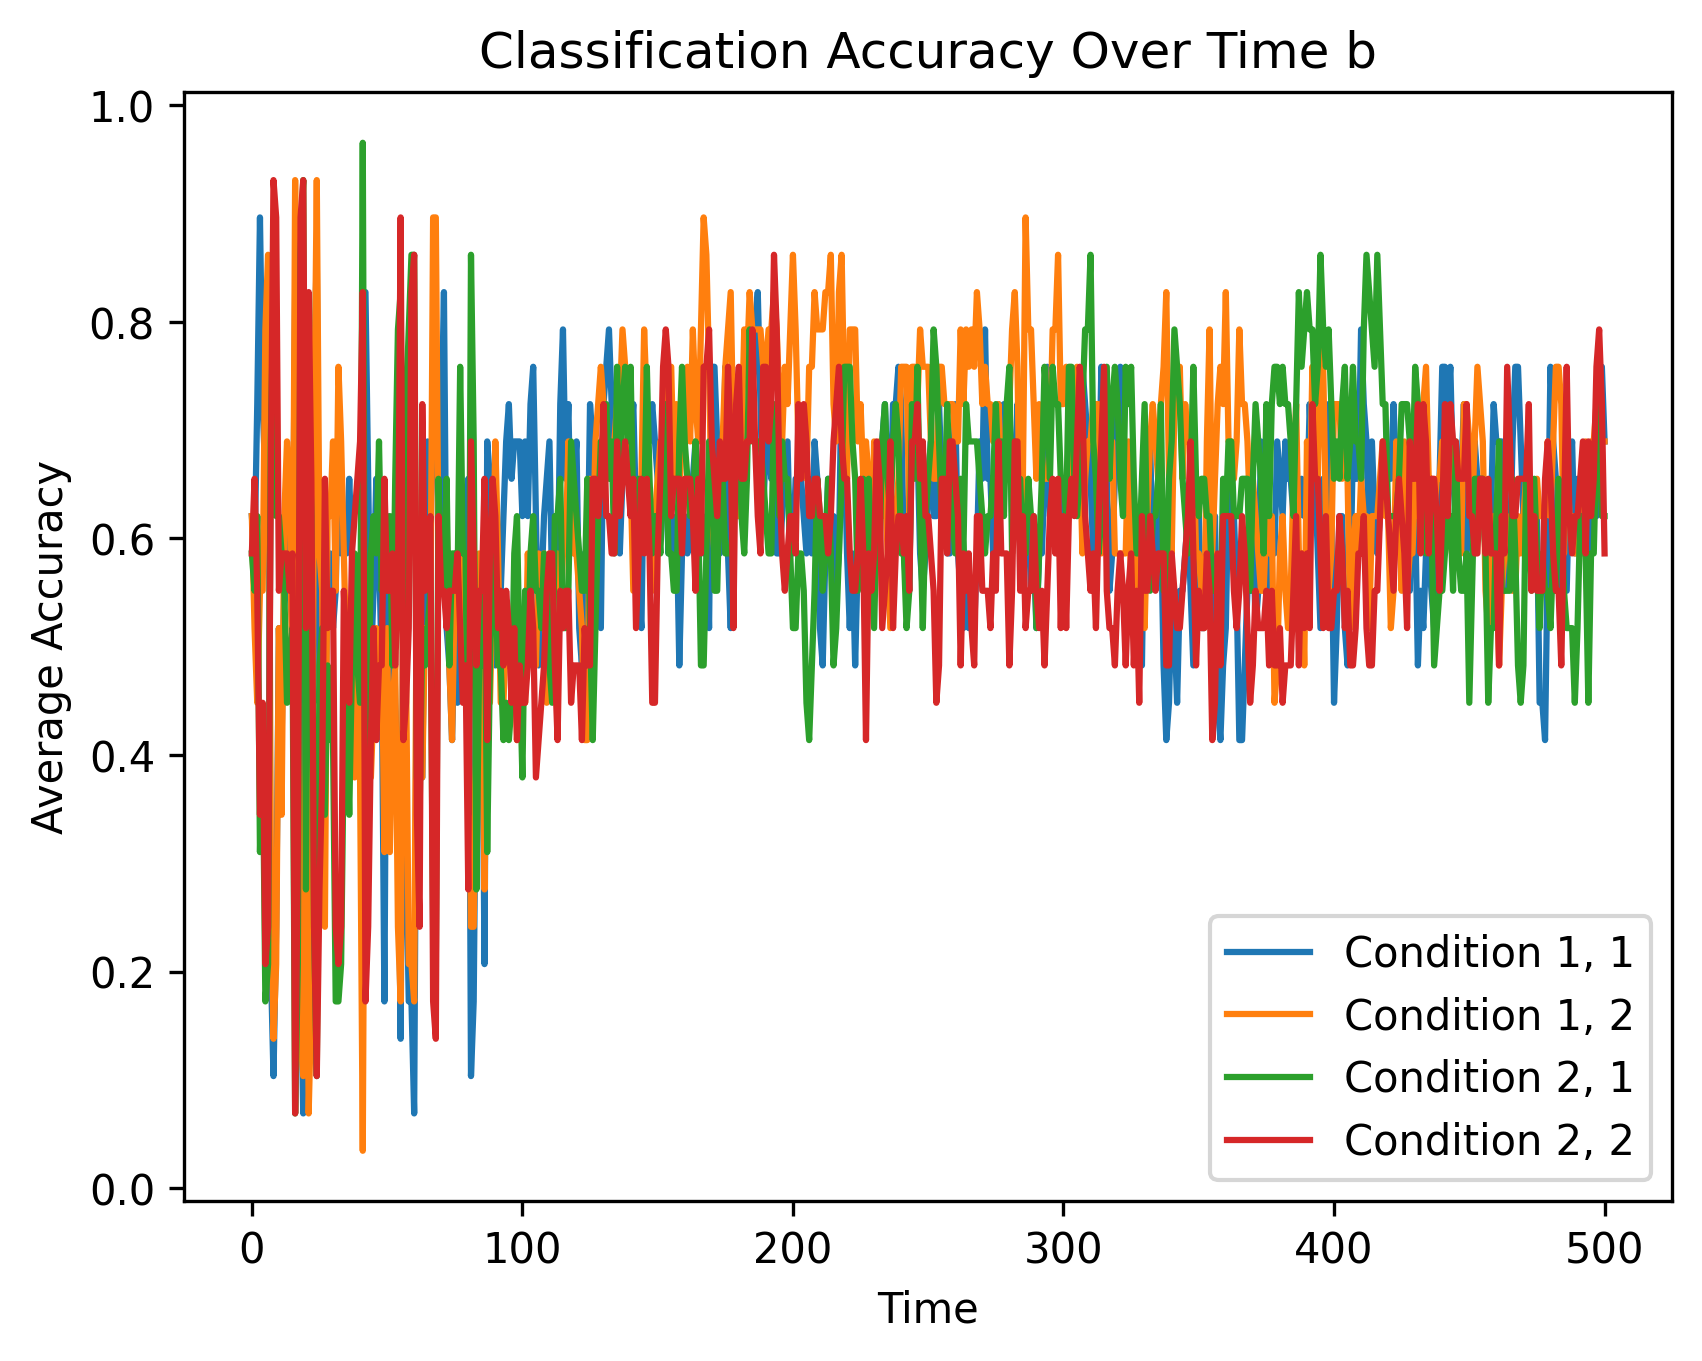

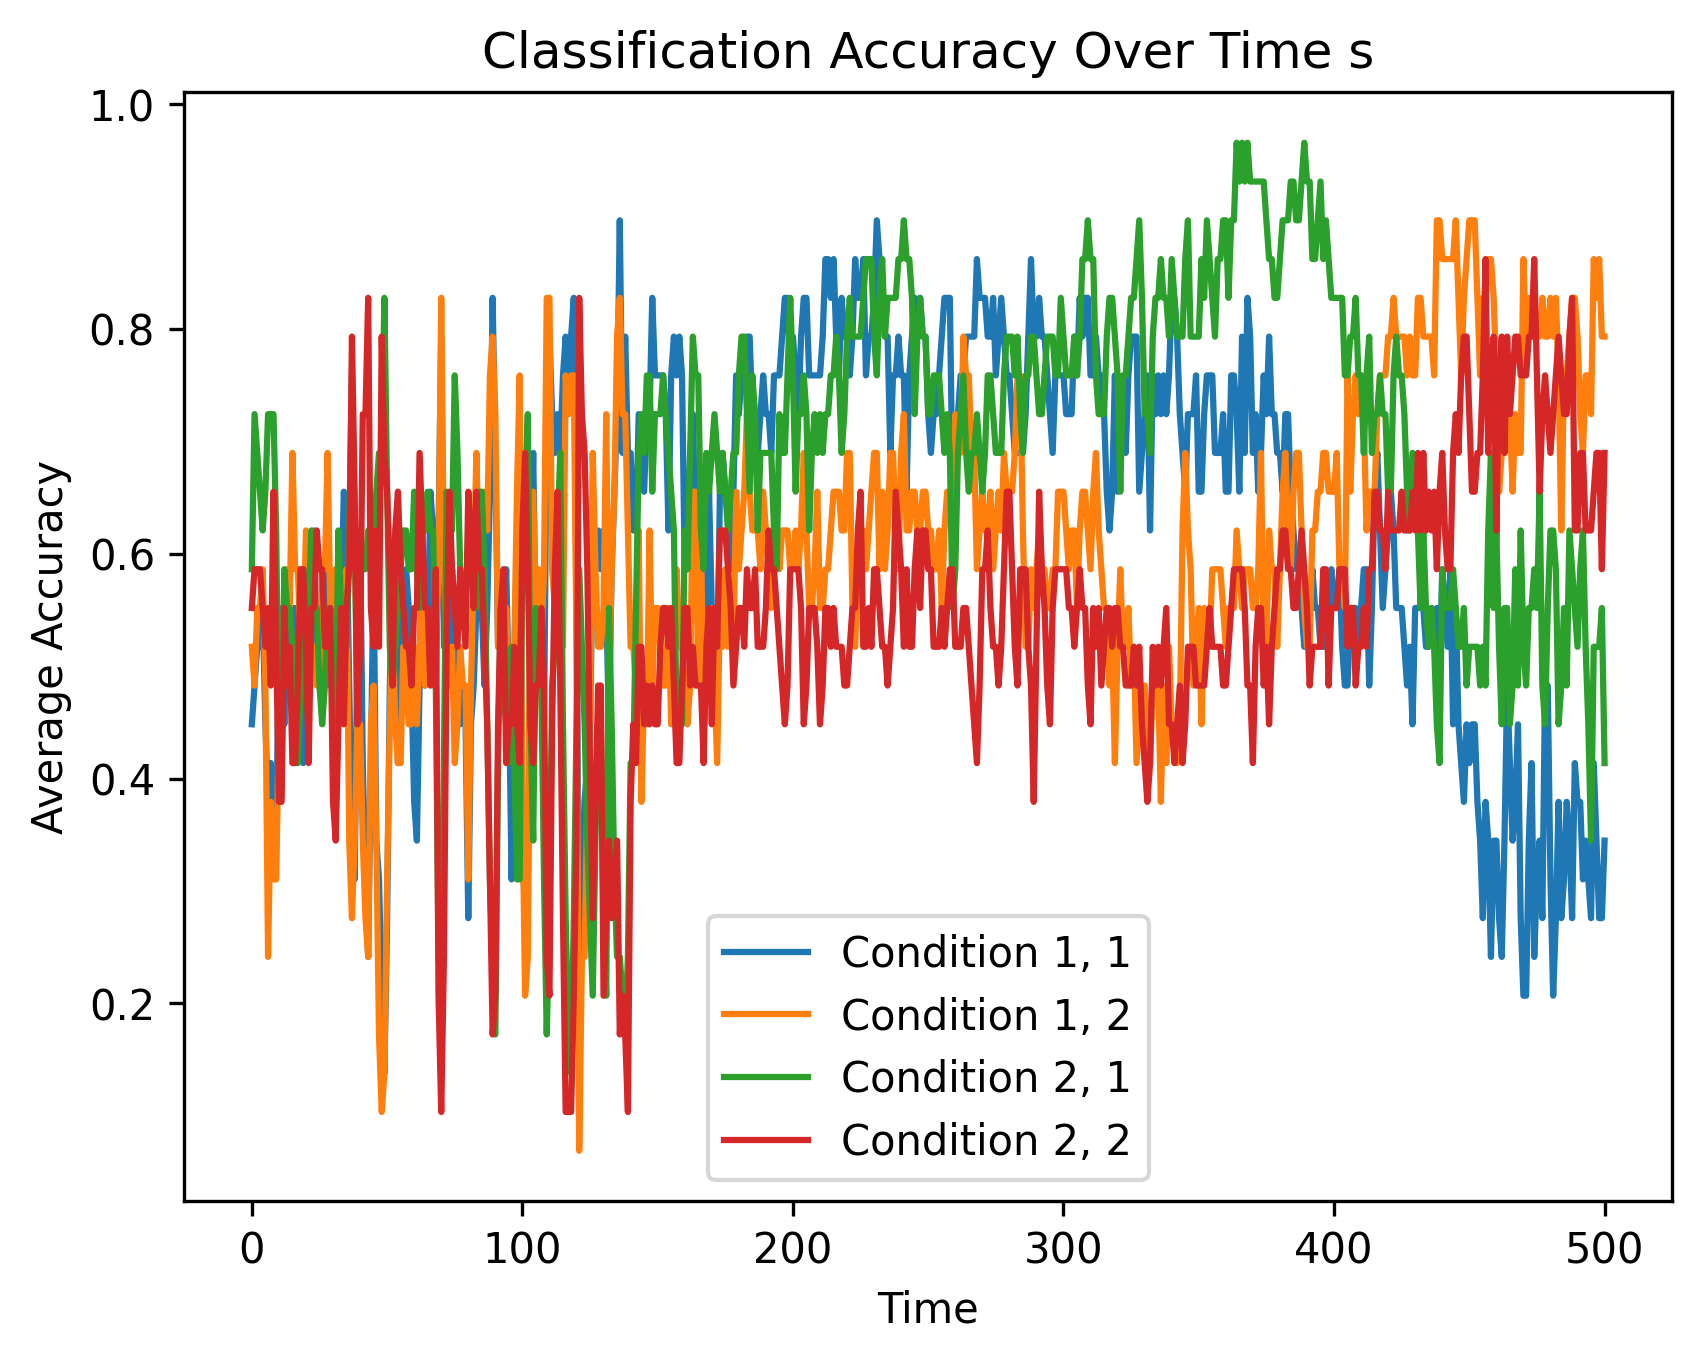

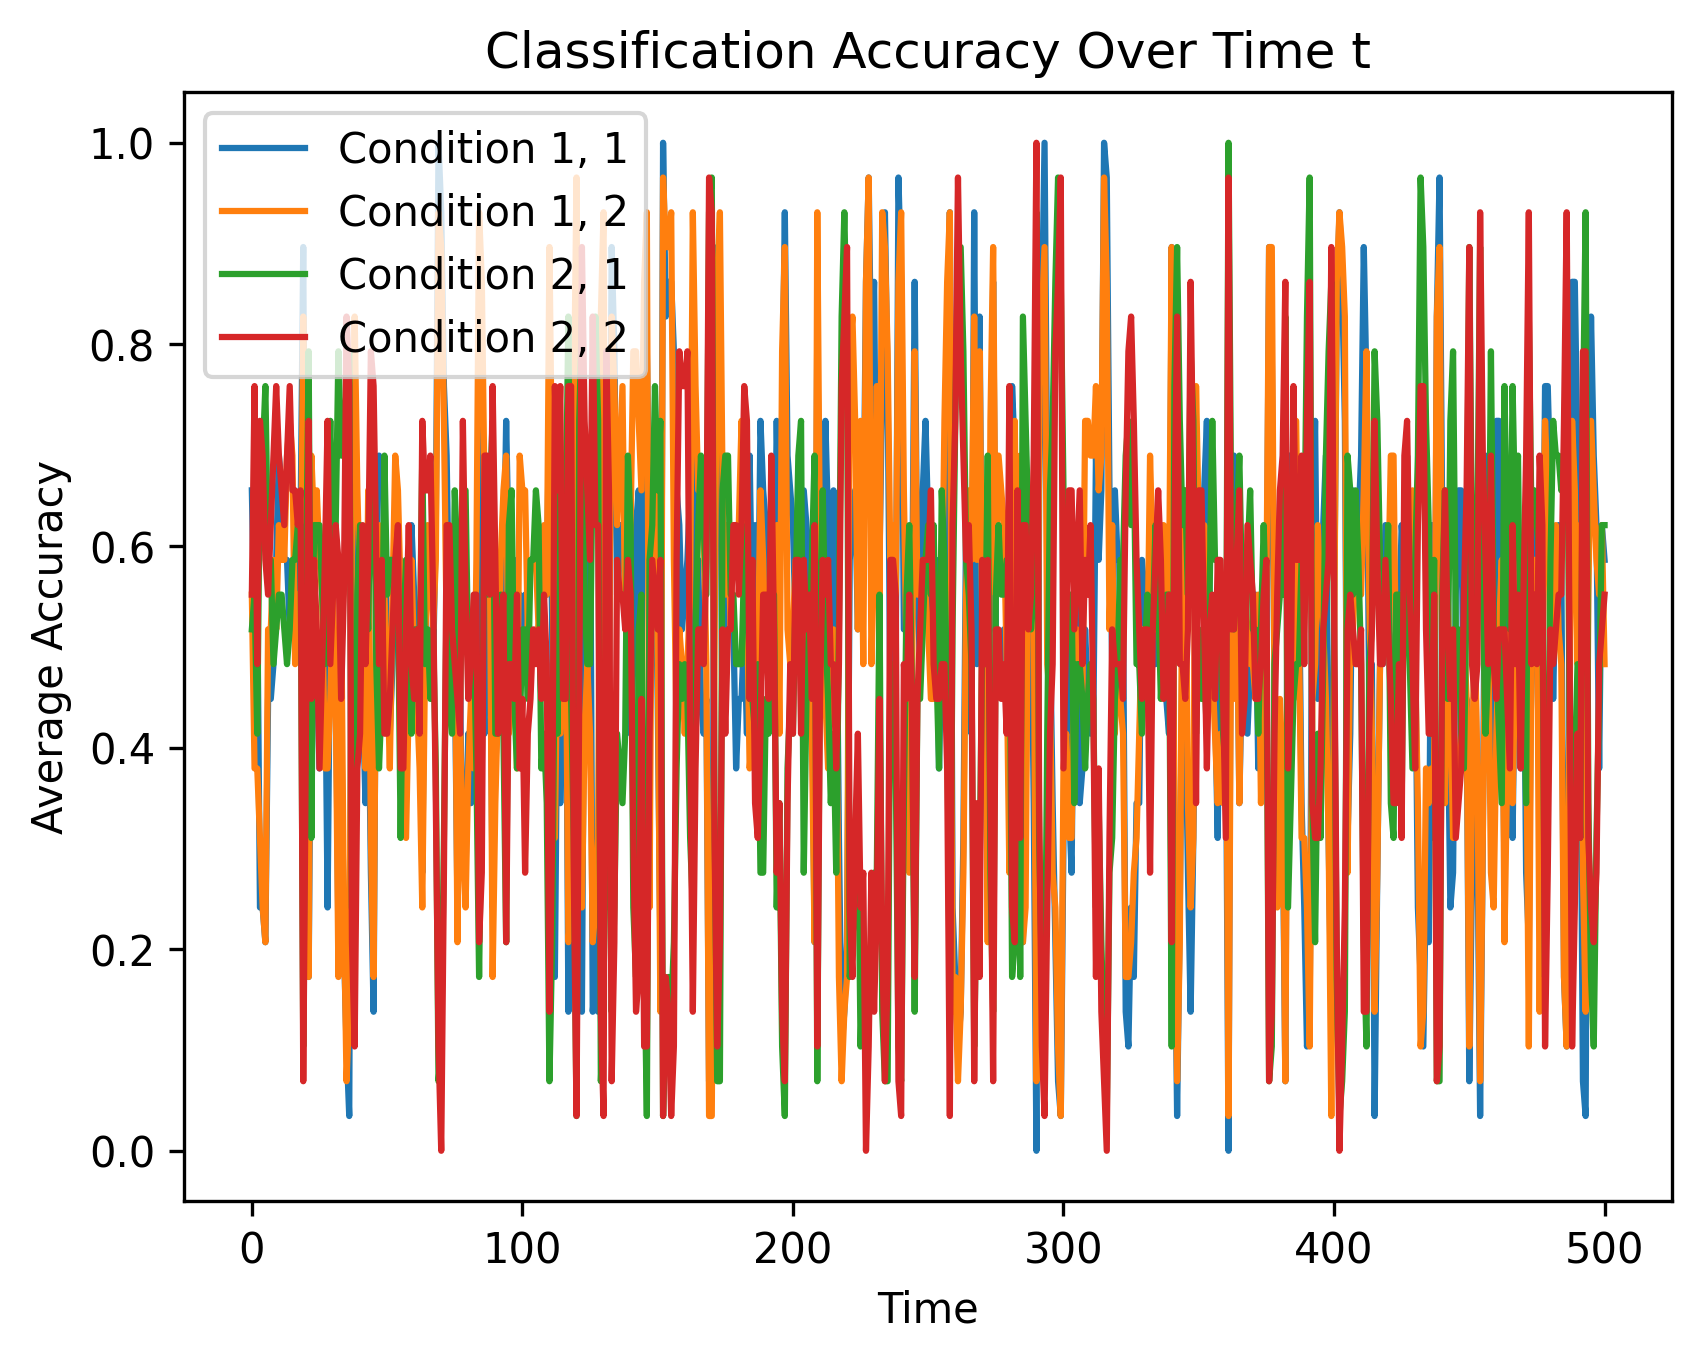

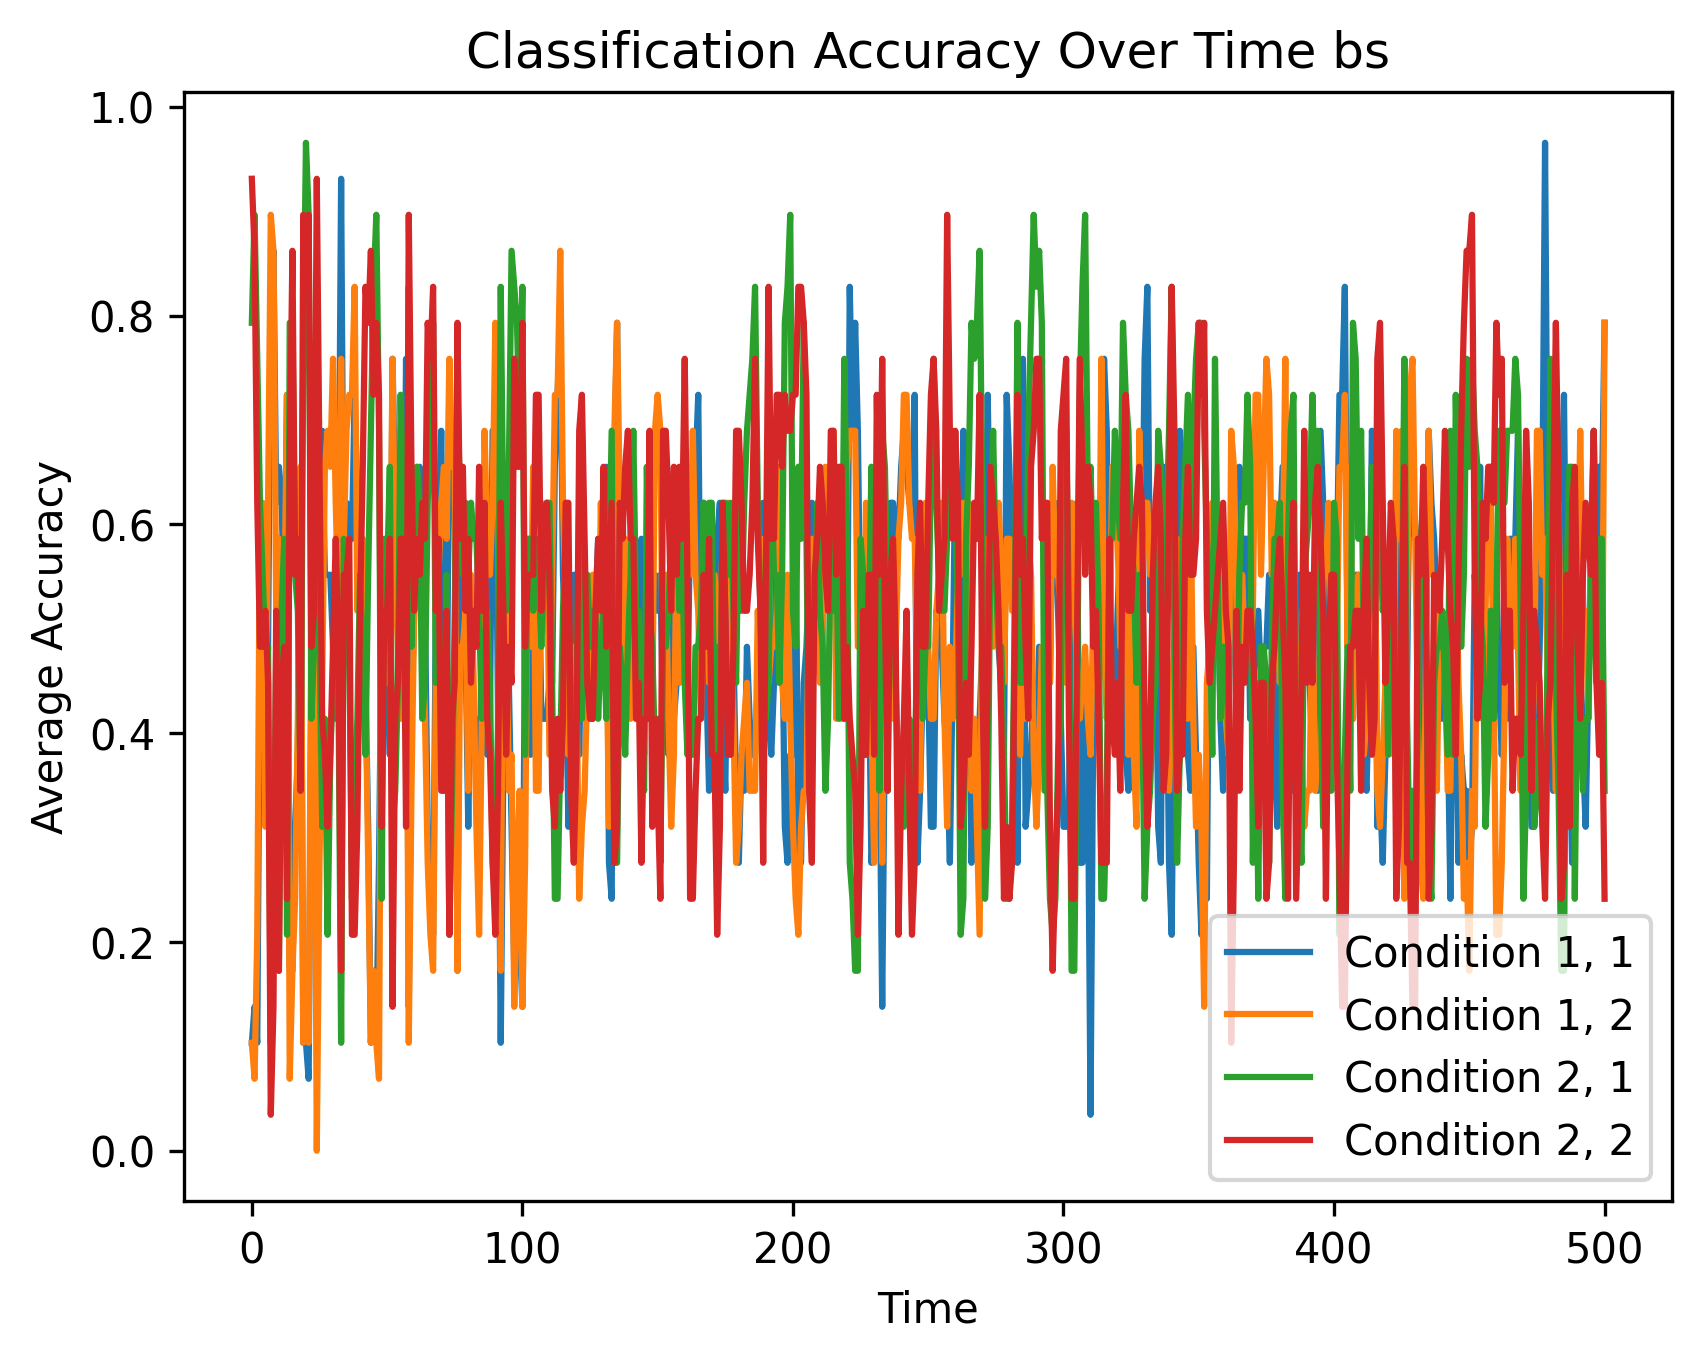

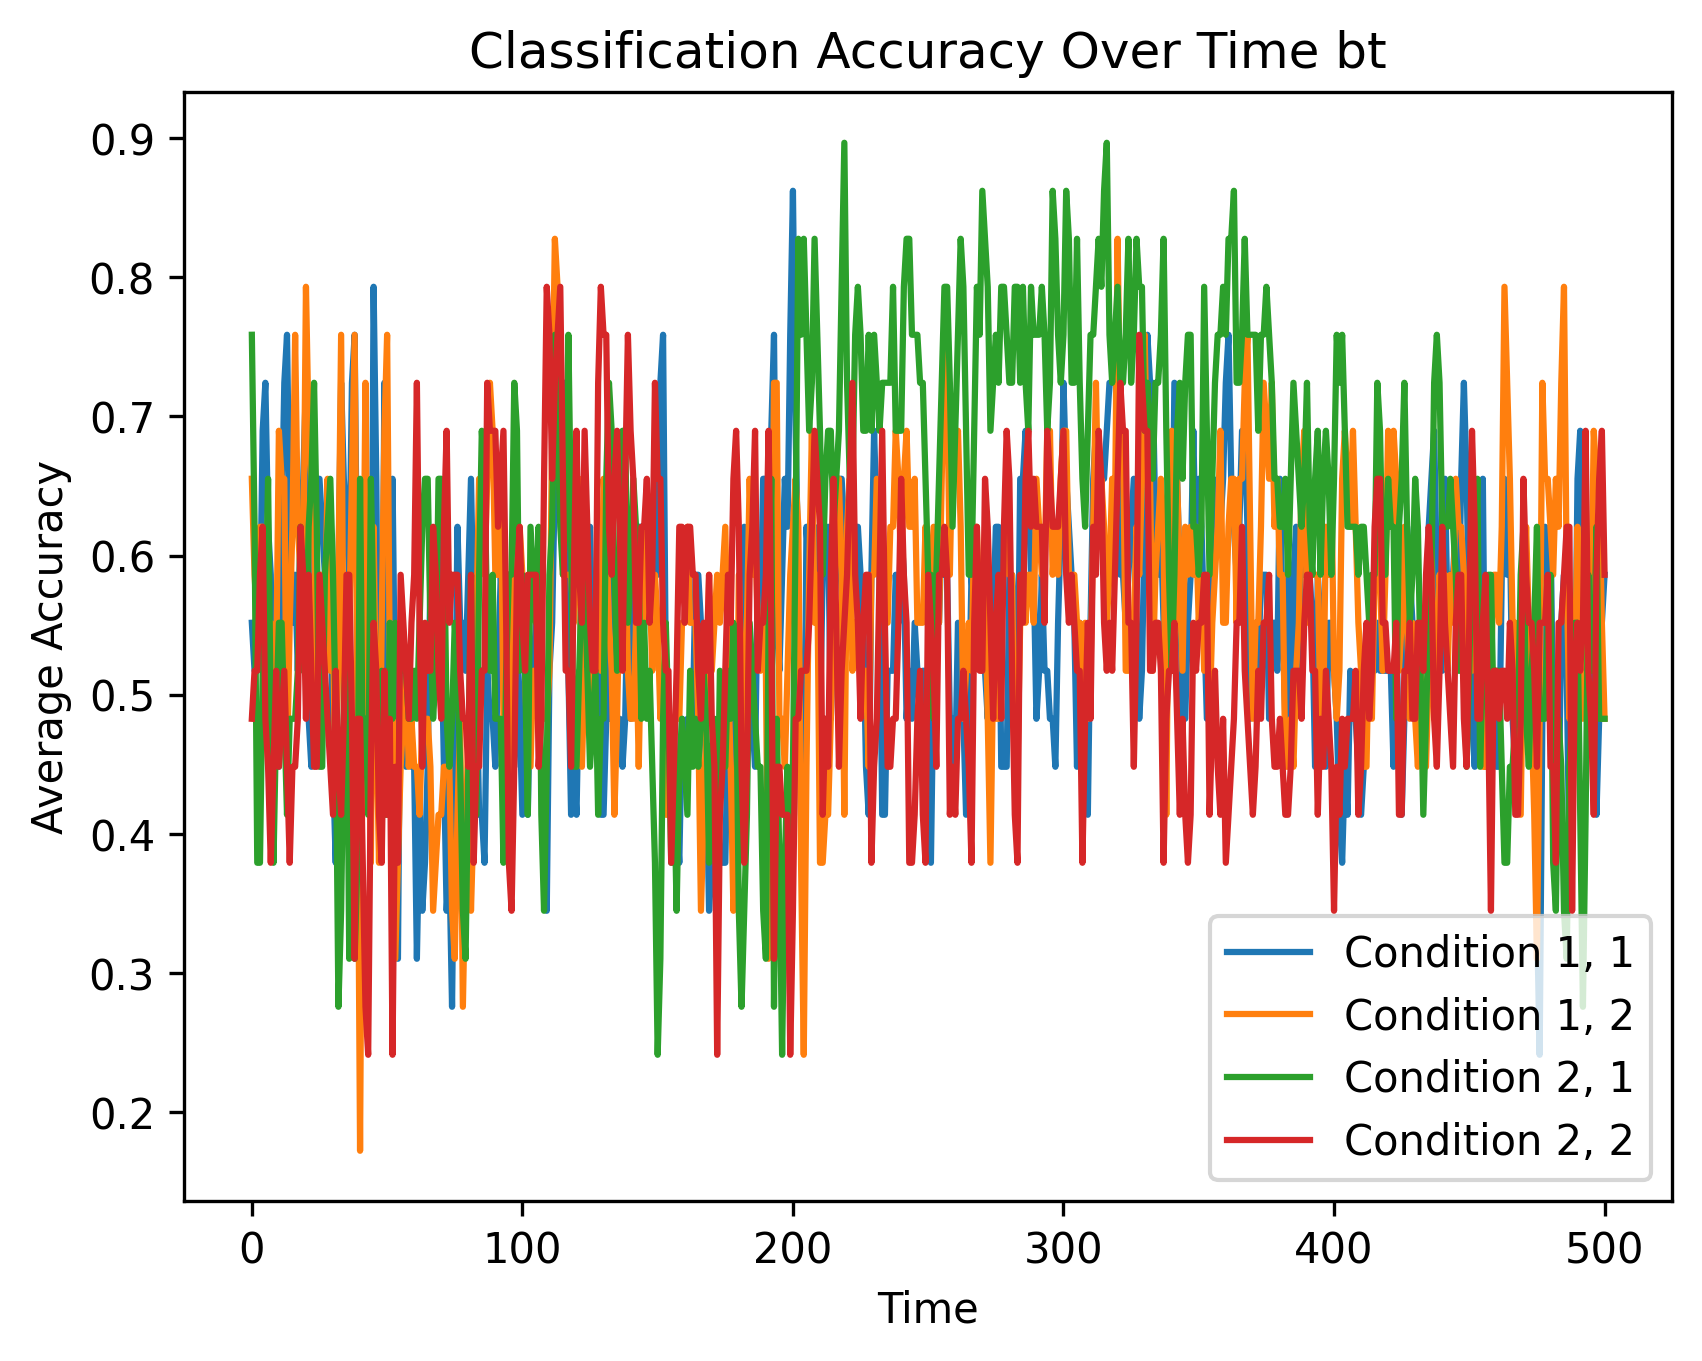

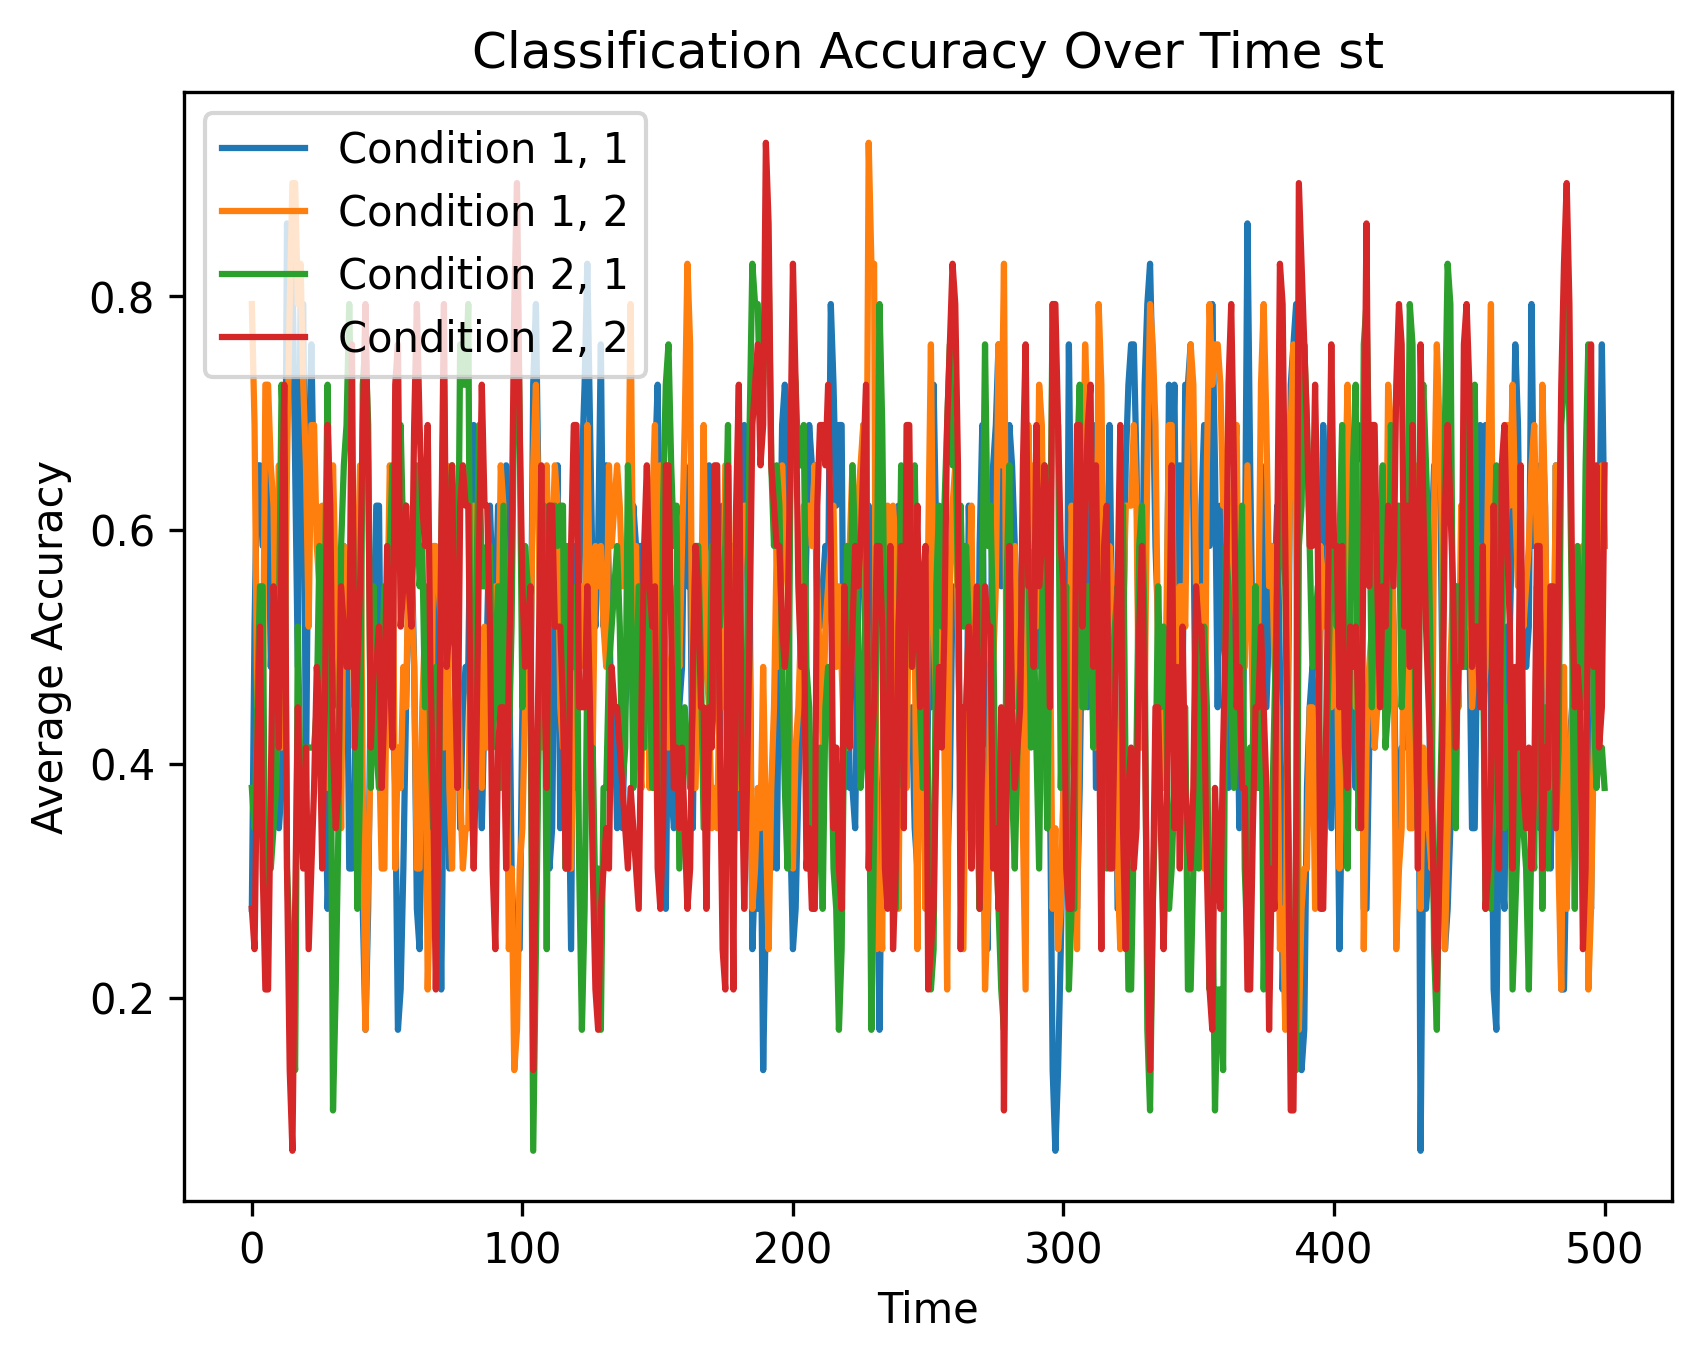

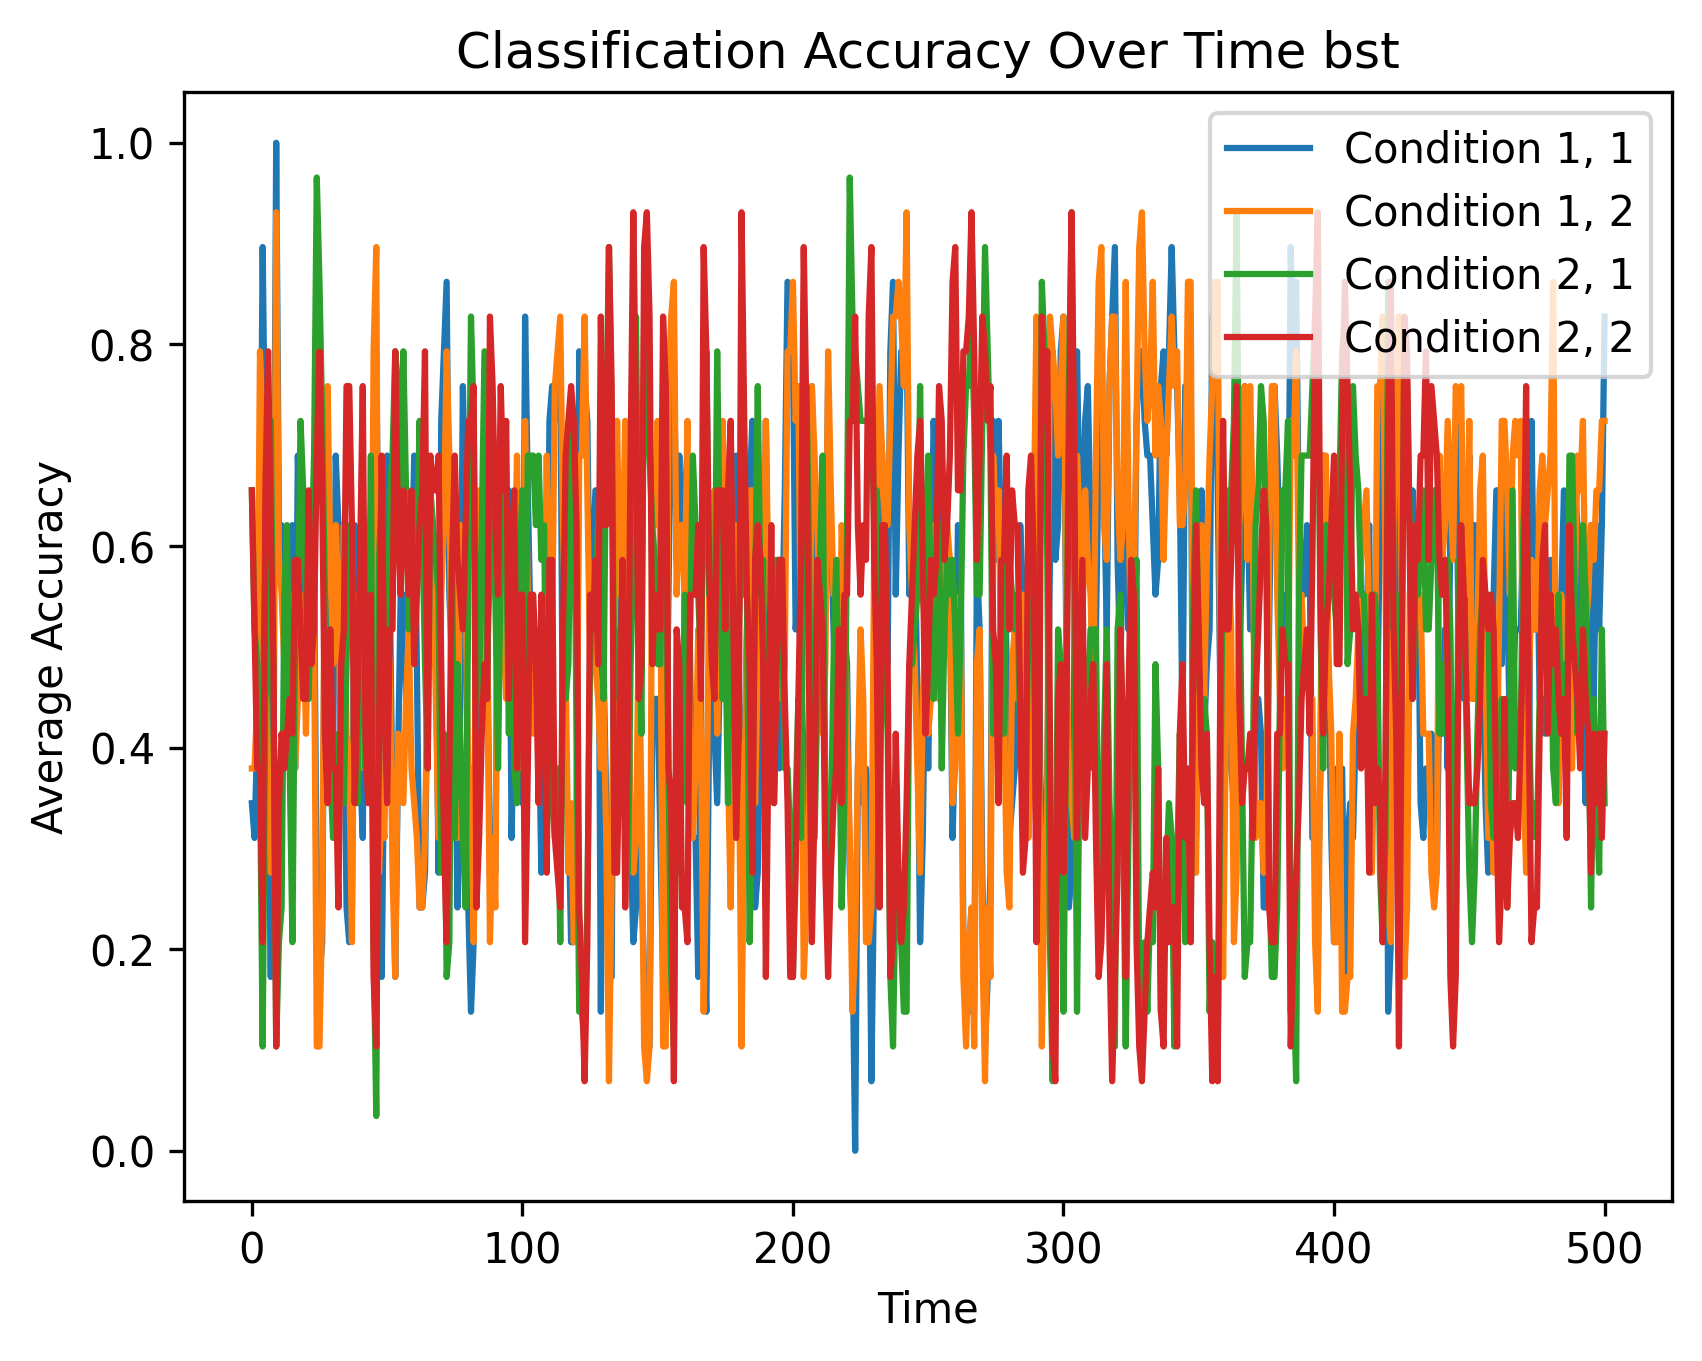

In [6]:
for comp in stat_comps_dic:
    bacc, macc, intacc = classify_trials(cvz,mz, stat_comps=filter_dict([comp],stat_comps_dic))

    accuracy_mean = np.mean(bacc, axis=0)

    fig, ax = plt.subplots(dpi = 300)

    for i in range(2):
        for j in range(2):
            ax.plot(accuracy_mean[i, j, :], label=f'Condition {i+1}, {j+1}')

    ax.set_xlabel('Time')
    ax.set_ylabel('Average Accuracy')
    ax.set_title(f'Classification Accuracy Over Time {comp}')
    ax.legend()

    plt.show()